# Lista 04 - Teste de Hipótese

In [1]:
#Defina a semente de geração de números aleatórios
#Não gerem mais números aleatórios do que o necessário, ou a correção dará errado
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(2019104)

# Exercício 01:

Em uma determinada universidade, foi realizada uma entrevista em que se desejava coletar respostas de alunos de todas as grandes áreas de conhecimento. Dentre os 1000 entrevistados, cada área teve a seguinte quantidade de alunos:

* Exatas: 100
* Humanas: 600
* Biológicas: 300

No entanto, a qualidade da amostra foi questionada. Argumentou-se que a proporção de alunos de Humanas entrevistados foi muito maior que a proporção de alunos da mesma área na universidade como um todo. Na universidade, há cadastro de:

* 2000 alunos de Exatas
* 8000 alunos de Humanas
* 2500 alunos de Biológicas

A) Retorne uma lista de True ou False de acordo com as afirmativas abaixo:

    1: A respeito da hipótese nula, podemos realizar testes que nos permitam aceitá-la como verdadeira.
    2: Podemos definir a seguinte hipótese nula: "A amostra utilizada na entrevista não foi gerada de forma uniformemente aleatória".
    3: Podemos definir a seguinte hipótese nula: "A amostra utilizada na entrevista foi gerada de forma uniformemente aleatória".
    
Exemplo:

```python
def q1a():
    return [ False, False, False ]
```

In [3]:
def q1a():
    one   = False # "Apenas falhamos em refutá-la"
    two   = False # Uma hipótese nula é uma hipótese que pretende
                  # confrontar com os dados
    three = False # Uma hipótese nula é uma hipótese que pretende
                  # confrontar com os dados
    return [one, two, three]

q1a()

[False, False, False]

B) Para comparar as distribuições, implemente a métrica de Total Variation Distance.

In [4]:
def tvd(p, q):
    return sum(abs(p-q))/2

In [5]:
from numpy.testing import *
pop = np.array([0.15, 0.18, 0.12, 0.54, 0.01])
samp = np.array([0.26, 0.08, 0.08, 0.54, 0.04])
assert_equal( tvd(pop,samp), 0.14 )

C) Calcule o TVD da amostra utilizada na entrevista

__Dica:__ A Total Variation Distance é uma métrica de distância entre distribuições de probabilidade, não entre quantidades absolutas.

In [6]:
def q1c():
    p = np.array([0.1, 0.6, 0.3])
    q = np.array([0.16, 0.64, 0.2])
    return tvd(p,q)

q1c()

0.1

D) Implemente a função que simule uma amostra uniformemente aleatória, retornando uma lista de proporções para cada categoria (Exatas, Humanas, Biológicas).

Exemplo: 
```python
def gera_amostra(tamanho_amostra):
    return [0.6, 0.0, 0.4]
```
__Dica:__ crie uma lista para a população (indicando a área de conhecimento do estudante por 0,1 ou 2, por exemplo) e use a função ```numpy.random.shuffle``` para embaralhar os dados. Depois, pegue os primeiros elementos da lista para formar a amostra, e calcule as proporções a partir disso.

In [7]:
def gera_amostra(tamanho_amostra):
    amostra = np.random.choice(3, tamanho_amostra)
    u, counts  = np.unique(amostra, return_counts=True)
    quantidade = np.array([0.0, 0.0, 0.0])
    dic = dict(zip(u, counts))
    if 0 in dic:
        quantidade[0] = dic[0]
    if 1 in dic:
        quantidade[1] = dic[1]
    if 2 in dic:
        quantidade[2] = dic[2]
    exatas     = quantidade[0]/tamanho_amostra
    humanas    = quantidade[1]/tamanho_amostra
    biologicas = quantidade[2]/tamanho_amostra
    return [exatas, humanas, biologicas]

gera_amostra(10)

[0.5, 0.2, 0.3]

E) Gere 10000 amostras, e plote o gráfico de distribuição dos valores de TVD. Coloque no gráfico um ponto mostrando o TVD da amostra da entrevista.

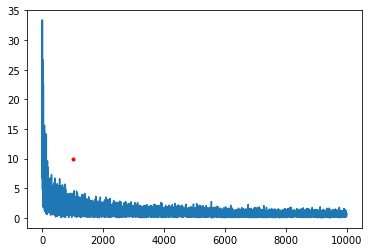

In [8]:
expected   = np.array([0.3333333333333333, 0.3333333333333333, 0.3333333333333333])
tvd_distr = []
for i in range (3, 10000):
    tvd_distr.append(tvd(gera_amostra(i), expected)*100)

ponto = [1000, q1c()*100]
tvd_distr = np.array(tvd_distr)
plt.plot(tvd_distr)
plt.plot(ponto[0], ponto[1], marker='o', markersize=3, color="red")

F) Escreva uma função que retorne a partir de qual valor de TVD não estamos mais dentro do intervalo de 90% de confiança

In [9]:
def q1f():
    size     = tvd_distr.size
    tvd_ord  = np.sort(tvd_distr)
    sup      = round(size*0.90)
    tvd_conf = tvd_ord[:sup]
    superior = tvd_conf[-1]/100    # Porque na questão acima,coloquei *100 para facilitar visualização
    return superior
    
q1f()

0.01949139637581851

# Exercício 02:

Usando os dados do arquivo ```baby.csv```, vamos realizar um teste por permutação.

In [10]:
import pandas as pd

In [11]:
df = pd.read_csv('baby.csv')

# Convertendo para unidades não EUA
df['Birth Weight'] = 0.0283495 * df['Birth Weight']
df['Maternal Pregnancy Weight'] = 0.0283495 * df['Maternal Pregnancy Weight']
df['Maternal Height'] = 0.0254 * df['Maternal Height']

df.head()

,Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
0,3.401940,284,27,1.5748,2.834950,False
1,3.203493,282,33,1.6256,3.827183,False
2,3.628736,279,28,1.6256,3.260193,True
3,3.061746,282,23,1.7018,3.543687,True
4,3.855532,286,25,1.5748,2.636503,False


A) Implemente uma função que retorne a diferença entre a média dos pesos dos bebês para as mães fumantes e a média para as mães não fumantes. Exemplo:

```python
def q2a(df):
    media_fumantes = 3.1
    media_nao_fumantes = 3.8
    return -0.7
```

In [12]:
def q2a(df):
    media_fumantes     = df['Birth Weight'].loc[df['Maternal Smoker'] == True].mean() 
    media_nao_fumantes = df['Birth Weight'].loc[df['Maternal Smoker'] == False].mean()
    return media_fumantes - media_nao_fumantes

q2a(df)

-0.2626905088456186

B) Realize permutações com os rótulos (mães fumantes / não fumantes), de tamanhos ```[10,100,500,1000,5000]```. Plote gráficos mostrando a distribuição das diferenças entre as médias de peso dos bebês, conforme se aumenta a quantidade de permutações. Ou seja, um gráfico para 10 permutações, um para 100, e assim por diante.

Como exemplo, a imagem abaixo mostra o gráfico para 100 permutações.

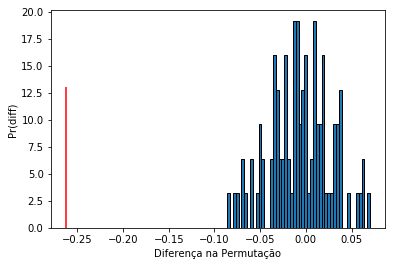

In [13]:
from IPython.display import Image
Image('100permutacoes.png')

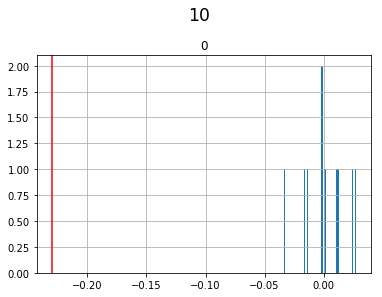

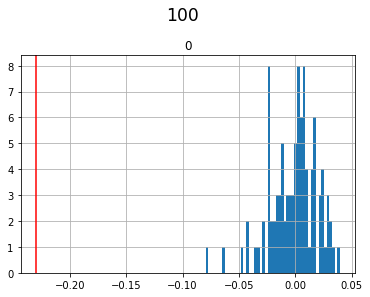

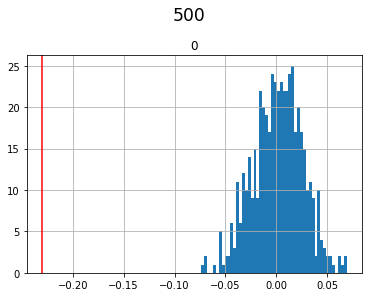

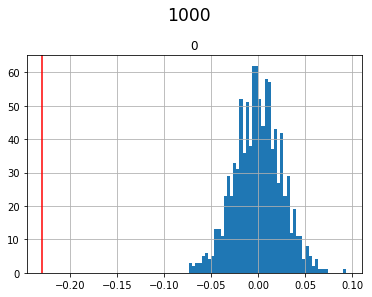

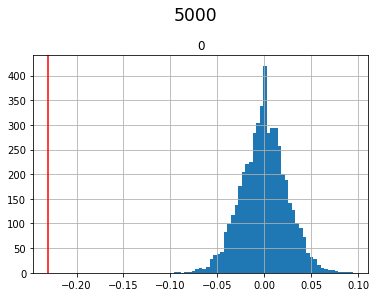

In [14]:
permutacoes = np.array([10,100,500, 1000, 5000])

bw_smoker = df.loc[df['Maternal Smoker'] == True].iloc[0]['Birth Weight'].mean()
bw_non_smoker = df.loc[df['Maternal Smoker'] == False].iloc[0]['Birth Weight'].mean()
difference_smoke_not_smoke = float("%.2f" % (bw_non_smoker-bw_smoker))

for i in permutacoes:
    dif = []
    for j in range(i):
        difference = (df.sample().iloc[0]['Birth Weight'] - df.sample().iloc[0]['Birth Weight'])/30
        dif.append(difference)
    dif_df = pd.DataFrame(dif)
    dif_df.hist(bins=50)
    plt.suptitle(i, x=0.5, y=1.05, ha='center', fontsize='xx-large')
    plt.axvline(difference_smoke_not_smoke, color='red')

B) Escreva abaixo o que você observou com os gráficos.

À medida que aumentamos o número de permutações, temos cada vez mais uma distribuição normal. Ou seja, à medida que temos mais dados, conseguimos entender melhor qual o padrão de comportamento da distribuição dos dados e se há ou não influência do fumo da mãe. 

OBS: dividi o valor das colunas azuis (os valores que entraram no array dif) por 30 para ficar mais próximo do desenho demonstrado. Nos meus dados normais (sem dividir por 30), podemos perceber que não há tanta influência quando pegamos aleatoriamente filhos de maes fumantes e não fumantes. Ainda que seja perceptível que haja alguma diferença.